## EDA & Data Preprocessing on Google App Store Rating Dataset

**Domain:** Mobile device apps

**Context:**
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.

**Data set Information:**
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.

**Attribute Information:**

**Attribute  Description**

**1. App :** Application name

**2. Category :** Category the app belongs to.

**3. Rating :** Overall user rating of the app

**4. Size :** Size of the app

**5. Installs :** Number of user reviews for the app

**6. Type :** Paid or Free

**7. Price :** Price of the app

**8. Content Rating :** Age group the app is targeted at - children/Mature 21+ /Adult

**9. Genres :** An app can belong to multiple genres (apart from its main category). For eg. a musical family game will belong to Music, Game, Family genres.

**10. Last Updated :** Date when the app was last updated on play store.

**11. Current Ver :** Current version of the app available on play store.

**12. Android Ver :** Min required Android Version.

## Importing required libraries and read the dataset

**Importing the required libraries**

In [1]:
#Importing the required Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 
from IPython.display import display, HTML

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Reading the dataset**

In [3]:
data = pd.read_csv('Apps_data+(1).csv')

## Checking the first few samples, shape and info of the data

**Checking the first 5 samples of the data useing the .head() method**

In [4]:
display(data.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Checking the shape of the data using .shape**

In [5]:
data.shape

(10841, 13)

**We can see that the data has 10841 rows and 13 columns**

**Checking the info using method .info()**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* **We can see that the original data has 12 features which are of object data type and 1 feature(Ratings Category) which is of float data type.**
* **Rating, Type, Content Rating, Current Ver and Android Ver are the features which have 1 or more null values.**

## Summary statistics of the dataset.

**Summary statistics of the dataset can be known by using the method .describe()**

In [7]:
data.describe()

,Rating
count,9367.00
mean,4.19
std,0.54
min,1.00
25%,4.00
50%,4.30
75%,4.50
max,19.00


**Here were are obtaining summary statistics of dataset which have datatype object**

In [8]:
data.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


* **Current Ver and Android Ver columns have some null values so they should be worked upon.**
* **Rating column has max rating of 19 which is peculiar considering maximum rating for play store app is 5.**
* **Categorical columns should be converted to numerical through encoding for model building**

## Checking if there are any duplicate records in the dataset and dropping them

**For checking if there is duplicate data we use the method .duplicated()**

In [9]:
duplicate_data = data.duplicated()

In [10]:
duplicate_data.sum()

483

**We have found duplicate data in 483 rows**

**Dropping the duplicate data using the method .drop_duplicates(inplace = True)**

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data.shape #to confirm that the rows are dropped

(10358, 13)

## Checking the unique categories of the column 'Category' to find out if there is any invalid category and drop them.

In [13]:
unique_categories  = data['Category'].unique()
unique_categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

* **We can clearly see that 1.9 is a numerical value in a category column which has object datatype value. So clearly it is an invalid category**
* **We will drop it using the .drop() method with inplace = True to permanently drop it.**

In [14]:
data.drop(data[data['Category'] == '1.9'].index,inplace=True)

In [15]:
data['Category'].unique() #To check if the value of 1.9 is dropped or not

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [16]:
data.shape #To confirm that one row is dropped 

(10357, 13)

## Checking if there are any missing values present in the column 'Rating' and dropping them.

### Finding the missing values in Rating column and dropping them 

**We can find the number of missing values in a column using the combination of .isna().sum() methods**

In [17]:
print("The number of missing values in column 'Rating'is:",data['Rating'].isna().sum())

The number of missing values in column 'Rating'is: 1465


* **We can see that there are significant number of missing values present in the column Rating** 
* **To Drop the missing values we use the method dropna() with subset = ['Rating'] to drop the missing values of only the column 'Rating' and inplace = True to permanently drop the missing value present in Rating**

In [18]:
data.dropna(subset=['Rating'], inplace = True)

In [19]:
data.shape #To confirm if 1465 rows have been dropped

(8892, 13)

### Creating a new column 'Rating_category'

* **Here we are creating a new column named 'Rating_category' by converting Rating to high and low with >3.5 being high and rest being low**
* **We did that using apply method where we used lambda function**

In [20]:
data['Rating_category'] = data['Rating'].apply(lambda x : 'high' if x > 3.5 else 'low')

In [21]:
data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
4456,[Sub/EMUI] P Pro - EMUI 8.1/8.0/5.X Theme,PERSONALIZATION,4.00,13,19M,100+,Paid,$0.99,Everyone,Personalization,"July 20, 2018",H7SubTV0.1_TV0.4,7.0 and up,high
9690,Out There Chronicles - Ep. 1,FAMILY,4.40,1516,44M,"50,000+",Paid,$2.99,Everyone,Role Playing,"November 27, 2017",1.0.4,4.2 and up,high
4598,AT&T Digital Life,LIFESTYLE,4.10,10067,Varies with device,"1,000,000+",Free,0,Everyone,Lifestyle,"December 7, 2017",Varies with device,4.3 and up,high


In [22]:
data.shape

(8892, 14)

## Checking the distribution of the newly created column 'Rating_category'

**Here we use value_counts method which gives the number of occurences of unique values in a column and we also use normalize = True which calculates proportion of each category instead of count.**

In [23]:
distribution = data['Rating_category'].value_counts(normalize=True)
print(distribution)

high   0.90
low    0.10
Name: Rating_category, dtype: float64


**here we can see that almost 90 percent of the values in the column have rating_category High and about 10% being low**

In [24]:
distri = data['Rating_category'].value_counts()
print(distri)

high    8012
low      880
Name: Rating_category, dtype: int64


**We can also showcase the distribution using a bar plot**

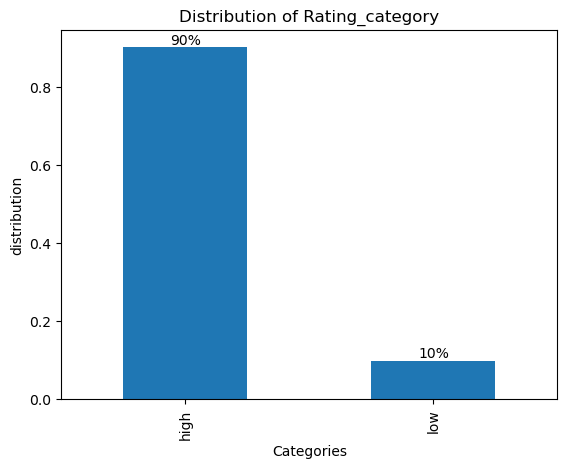

In [25]:
ax = distribution.plot(kind='bar')
for i, v in enumerate(distribution):
    ax.text(i, v, f'{v*100:.0f}%', ha='center', va='bottom')
plt.xlabel('Categories')
plt.ylabel('distribution')
plt.title('Distribution of Rating_category')
plt.show()

## Converting the column "Reviews'' to numeric data type

**Converting the Reviews to numeric data type using the method .to_numeric() errors = 'coerce' to handle any non numeric value if present**

In [26]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   int64  
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


**As you can see we have converted the Reviews column to a numeric data type (int64)**

## Checking the presence of outliers in the column and handling the outliers using a transformation approach.(Using log transformation)

**Now we check for the outliers present in the column using Z-score**

In [28]:
outliers = data[(np.abs(data['Reviews'] - data['Reviews'].mean()) > 2 * data['Reviews'].std())]

**Handling the outliers using log transformation**

In [29]:
data['Transformed_Reviews'] = np.log(data['Reviews'])

**Replacing the outliers using median of the tranformed reviews column**

In [30]:
median_transform = np.median(data['Transformed_Reviews'])
data.loc[outliers.index, 'Transformed_Reviews'] = median_transform

## The column 'Size' contains alphanumeric values, so we treat the non numeric data and convert the column into suitable data type. (Replacing M with 1 million and K with 1 thousand, and droping the entries where size='Varies with device')

**To treat the alphanumeric values we write a function to treat non numeric data where we convert the column into a suitable data type**

In [31]:
def treat_alpha(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return pd.to_numeric(value, errors='coerce')
data['Size'] = data['Size'].apply(treat_alpha)

* **Since we used errors = 'coerce' non numeric data must've been converted to NaN, so 'Varies with device' can be removed by using the method .dropna()**

* **let us drop all the rows which have NaN(which earlier had Varies with device)**

In [32]:
data.dropna(inplace=True)

In [33]:
data.info() #after dropping the NaN value we have 7162 non null values in each features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  7162 non-null   object 
 1   Category             7162 non-null   object 
 2   Rating               7162 non-null   float64
 3   Reviews              7162 non-null   int64  
 4   Size                 7162 non-null   float64
 5   Installs             7162 non-null   object 
 6   Type                 7162 non-null   object 
 7   Price                7162 non-null   object 
 8   Content Rating       7162 non-null   object 
 9   Genres               7162 non-null   object 
 10  Last Updated         7162 non-null   object 
 11  Current Ver          7162 non-null   object 
 12  Android Ver          7162 non-null   object 
 13  Rating_category      7162 non-null   object 
 14  Transformed_Reviews  7162 non-null   float64
dtypes: float64(3), int64(1), object(11)
m

## Checking the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [34]:
data['Installs'].head(2)

0     10,000+
1    500,000+
Name: Installs, dtype: object

**We can observe that installs has '+' symbol at the end of every value, we can remove that by using str.rstrip('+')**

In [35]:
data['Installs'] = data['Installs'].str.rstrip('+')

**To remove comas we can use the str.replace() method**

In [36]:
data['Installs'] = data['Installs'].str.replace(',','')

**To convert the data type to a numeric data type we use .to_numeric() method**

In [37]:
data['Installs'] = pd.to_numeric(data['Installs'], errors = 'coerce')

In [38]:
data['Installs'].info() #we see that the Installs column has been converted into a numeric data type(int64)

<class 'pandas.core.series.Series'>
Int64Index: 7162 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
7162 non-null   int64
dtypes: int64(1)
memory usage: 111.9 KB


## Checking the column 'Price' , removing the unwanted characters and converting the column into a suitable data type

In [39]:
data['Price'].sample(2)

6899    0
3194    0
Name: Price, dtype: object

**We observe that the column 'Price' has a dollar symbol, so we can remove that using str.replace**

In [40]:
data['Price'] = data['Price'].str.replace('$','')

**Next we convert the column into a numeric data type using the method .to_numeric()**

In [41]:
data['Price'] = pd.to_numeric(data['Price'], errors = 'coerce')

In [42]:
data['Price'].info() #As we can see the column has been converted into a numeric data type(float64)

<class 'pandas.core.series.Series'>
Int64Index: 7162 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
7162 non-null   float64
dtypes: float64(1)
memory usage: 111.9 KB


### EDA

### We remove columns which are redundant for our analysis

In [43]:
columns_to_drop = ["Last Updated","Current Ver","Android Ver"]

In [44]:
data.drop(columns = columns_to_drop,inplace=True)

In [45]:
data.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_category,Transformed_Reviews
10394,PBS KIDS Games,FAMILY,4.30,12919,94000000.00,1000000,Free,0.00,Everyone,Educational;Education,high,9.47


In [46]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Rating_category',
       'Transformed_Reviews'],
      dtype='object')

## What are the key factors that influence app ratings?

### How does the number of reviews correlate with app ratings across different categories?

In [47]:
grouped  = data.groupby("Category")

In [48]:
correlations = {}

In [49]:
for category, group in grouped:
    correlation = group['Reviews'].corr(group['Rating'])
    correlations[category] = correlation

In [50]:
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Category', 'Correlation'])

In [51]:
correlations_df

,Category,Correlation
0,ART_AND_DESIGN,0.14
1,AUTO_AND_VEHICLES,0.19
2,BEAUTY,0.31
3,BOOKS_AND_REFERENCE,0.09
4,BUSINESS,0.08
5,COMICS,0.01
6,COMMUNICATION,0.15
7,DATING,0.15
8,EDUCATION,0.31
9,ENTERTAINMENT,0.03


### Inference:
* For Categories **Beauty**, **Education** and **Travel and Local**, number of reviews has weak positive correlation with app ratings
* For Category **Events**, there is a weak negative correlation between Number of reviews and App Ratings

### Is there a significant difference in ratings between free and paid apps?

In [52]:
Free_apps = data[data["Type"]=="Free"]

In [53]:
Paid_apps = data[data["Type"]=="Paid"]

In [54]:
print("Average rating for Free Apps:",round(Free_apps["Rating"].mean(),2))

Average rating for Free Apps: 4.17


In [55]:
print("Average rating for Paid Apps:",round(Paid_apps["Rating"].mean(),2))

Average rating for Paid Apps: 4.27


### Inference:
* The Rating for paid apps is slightly higher on average when compared to free apps. But the differnce is minimal

## What trends can be observed in app installations?

### Which categories have the highest average number of installs?

In [56]:
data.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_category,Transformed_Reviews
7624,Little Lovely Dentist,FAMILY,4.20,17786,16000000.00,1000000,Free,0.00,Everyone,Casual,high,9.79


In [57]:
#Grouping by Category and taking the average of Installs
data.groupby("Category")["Installs"].mean().to_frame().sort_values(by="Installs",ascending=False).head()

,Installs
Category,
GAME,28035880.46
NEWS_AND_MAGAZINES,20093115.94
COMMUNICATION,18244860.11
PRODUCTIVITY,12651308.32
ENTERTAINMENT,11178507.46


### How does the price of an app affect its installation count?

In [58]:
data["Installs"].corr(data["Price"])

-0.010594548509015337

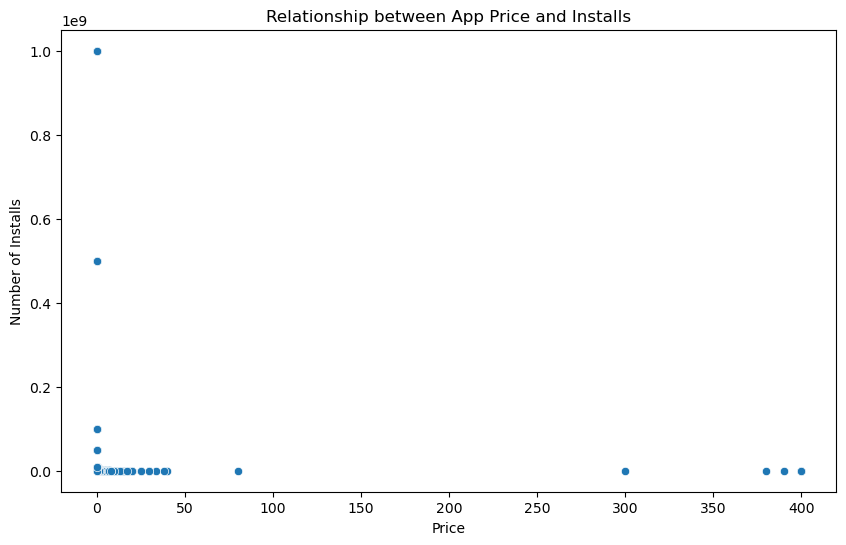

In [59]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price', y='Installs')
plt.title('Relationship between App Price and Installs')
plt.xlabel('Price')
plt.ylabel('Number of Installs')
plt.show()

### Inference:
* We find no significant relationship betweeb price of an app and Install Count

### What is the distribution of installs across different content ratings?

In [60]:
content_rating_installs = data.groupby("Content Rating")["Installs"].sum().to_frame().sort_values("Installs",ascending=False).reset_index()

In [61]:
content_rating_installs

,Content Rating,Installs
0,Everyone,37432679298
1,Teen,10461454110
2,Everyone 10+,8864534210
3,Mature 17+,1194480630
4,Adults only 18+,1500000
5,Unrated,50000


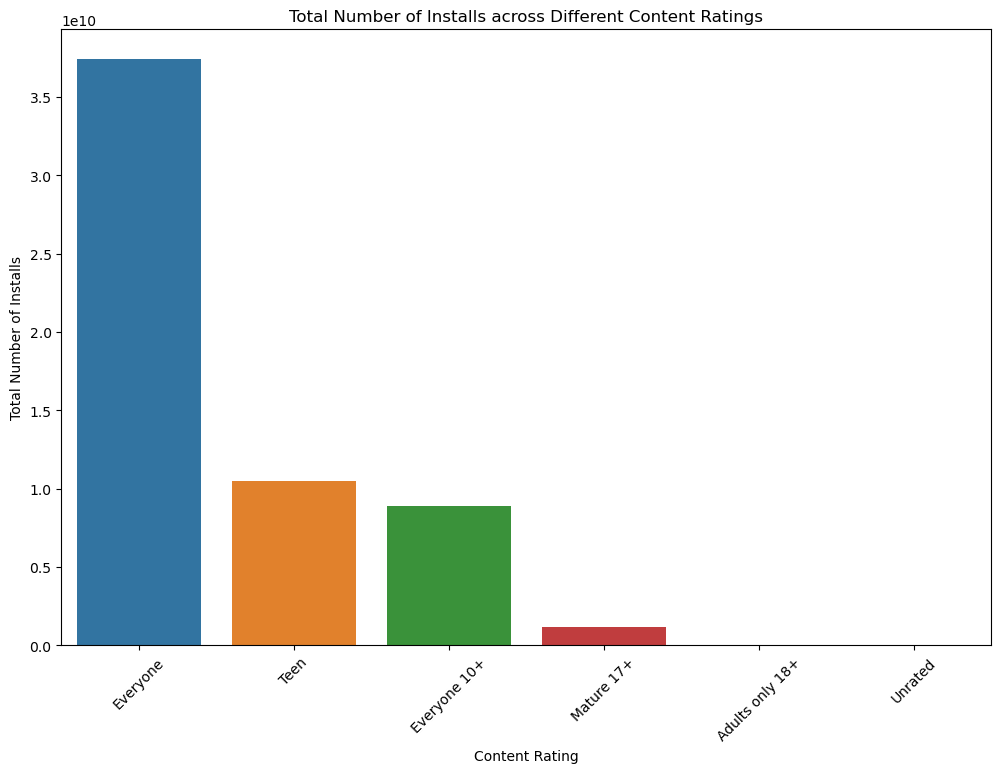

In [62]:
plt.figure(figsize=(12, 8))
sns.barplot(data=content_rating_installs, x='Content Rating', y='Installs')
plt.title('Total Number of Installs across Different Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Total Number of Installs')
plt.xticks(rotation=45)
plt.show()

### Inference:
* Majority of Installs were made from apps which had Content Rating **"Everyone"**.
* Apps with Content Rating **"Teen"** and **"Everyone 10+"** have decent number of installs as well.

## How do pricing strategies affect app performance?

### What is the relationship between app price and user rating?

In [63]:
data["Price"].corr(data["Rating"]) #finding the correlation

-0.019367344021974455

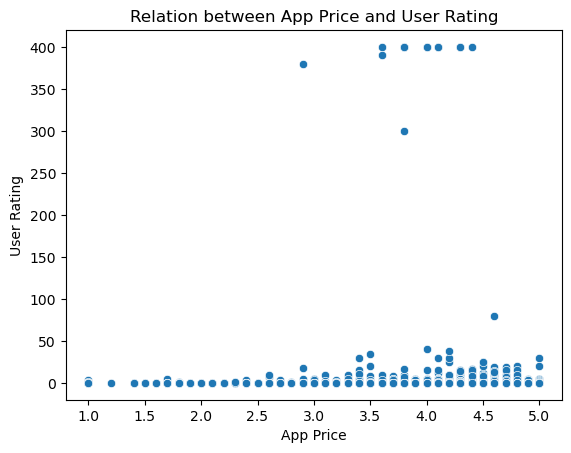

In [64]:
# Making a Visualisation of the result
sns.scatterplot(x="Rating",y="Price",data=data)
plt.title('Relation between App Price and User Rating')
plt.xlabel('App Price')
plt.ylabel('User Rating')
plt.show()

### Inference:
* There is no significant relation between App Price and App Rating

### How do the number of installs vary between free and paid apps?

In [65]:
Installs_for_each_Type = data.groupby("Type")["Installs"].sum().reset_index()

In [66]:
Installs_for_each_Type #result

,Type,Installs
0,Free,57912545176
1,Paid,42153072


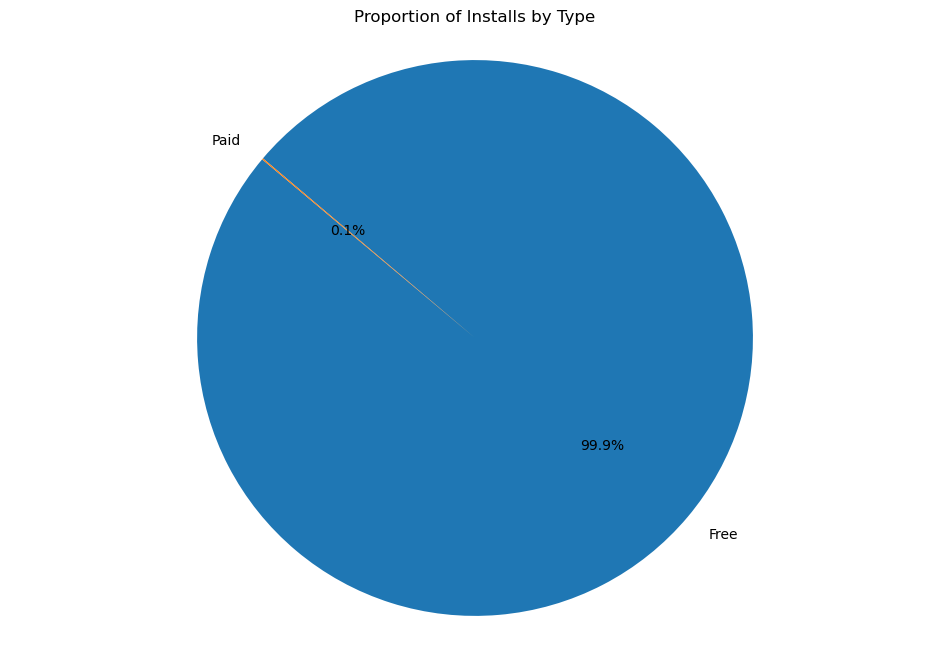

In [67]:
plt.figure(figsize=(12, 8))
plt.pie(Installs_for_each_Type["Installs"], labels= Installs_for_each_Type['Type'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Installs by Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Inference:
* 99.9% of the apps installed by users are free.
* Only 0.1% of the total apps installed are paid

### Are there certain price ranges that result in higher reviews and ratings?

In [68]:
pa = data[data["Type"]=="Paid"] #pa (paid apps)

In [69]:
def pr(price):
    if price <= 2:
        return "0-2"
    elif price <=4:
        return "2-4"
    else:
        return ">4"

In [70]:
pa["Price Range"] = pa["Price"].apply(pr)

In [71]:
pa.groupby("Price Range")[["Reviews","Rating"]].mean().reset_index()

,Price Range,Reviews,Rating
0,0-2,8284.14,4.29
1,2-4,7795.00,4.29
2,>4,6512.19,4.21


### Inference:
* The rating for all Price Ranges seem to be similar
* We see a pattern that as the price of the App increases the number of reviews it gets seem to decrease

## What are the characteristics of high-performing apps?

### Which genres have the highest average ratings?

In [72]:
data.groupby("Genres")["Rating"].mean().to_frame().rename(columns={"Rating":"Average Rating"}).sort_values(by="Average Rating",ascending=False).head(5)

,Average Rating
Genres,
Comics;Creativity,4.80
Board;Pretend Play,4.80
Health & Fitness;Education,4.70
Entertainment;Creativity,4.65
Puzzle;Education,4.60


### Top 5 App Categories with highest Average Ratings

In [73]:
data.groupby("Category")["Rating"].mean().to_frame().sort_values(by="Rating",ascending=False).head(5)

,Rating
Category,
EVENTS,4.47
EDUCATION,4.38
ART_AND_DESIGN,4.38
PARENTING,4.35
PERSONALIZATION,4.34


### Content Rating with the highest Average Ratings

In [74]:
data.groupby("Content Rating")["Rating"].mean().to_frame().sort_values(by="Rating",ascending=False)

,Rating
Content Rating,
Adults only 18+,4.55
Everyone 10+,4.26
Teen,4.23
Everyone,4.17
Mature 17+,4.10
Unrated,4.10


### Inference:
Apps with 
* **Genres:** Comics;Creativity, Board;Pretend Play, Health & Fitness;Education, Entertainment;Creativity, Puzzle;Education

* **Category:** EVENTS, EDUCATION, ART_AND_DESIGN, PARENTING, PERSONALIZATION

* **Content Rating:** Adults only 18+, Everyone 10+

seem to be performing better.

## What is the demographic distribution of apps in the PlayStore?

### What proportion of apps fall under each content rating category?

In [75]:
Category_Apps_Count = data.groupby("Content Rating")["App"].count().reset_index()

In [76]:
def prop(val):
    total = Category_Apps_Count["App"].sum()
    return val*100/total

In [77]:
Category_Apps_Count["Proportion of Apps"] = Category_Apps_Count["App"].apply(prop)

In [78]:
Category_Apps_Count.sort_values(by="Proportion of Apps",ascending=False)

,Content Rating,App,Proportion of Apps
1,Everyone,5704,79.64
4,Teen,826,11.53
3,Mature 17+,331,4.62
2,Everyone 10+,298,4.16
0,Adults only 18+,2,0.03
5,Unrated,1,0.01


In [79]:
Category_Apps_Count[["Content Rating","Proportion of Apps"]].sort_values(by="Proportion of Apps",ascending=False)

,Content Rating,Proportion of Apps
1,Everyone,79.64
4,Teen,11.53
3,Mature 17+,4.62
2,Everyone 10+,4.16
0,Adults only 18+,0.03
5,Unrated,0.01


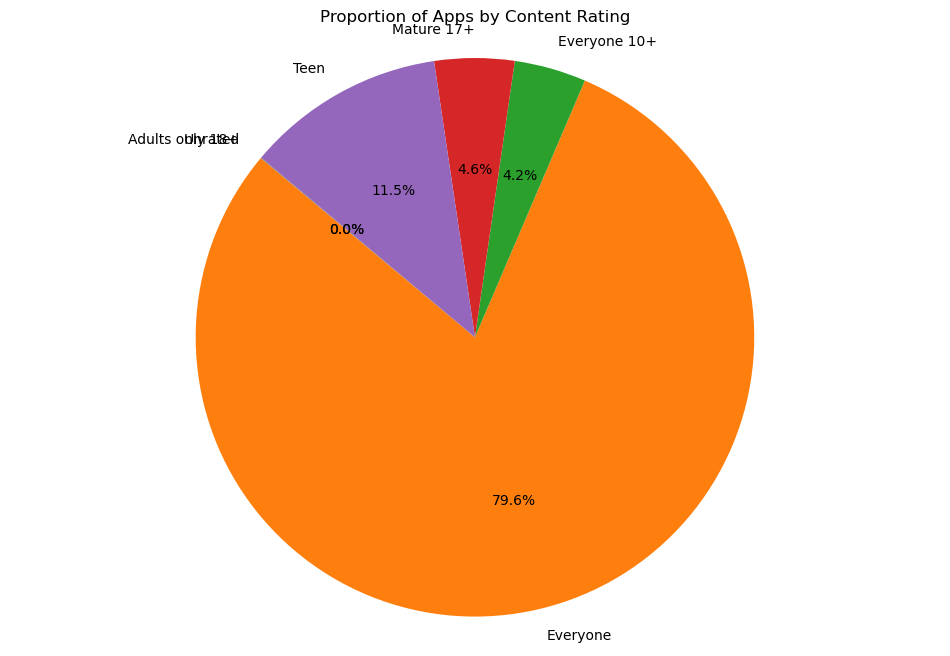

In [80]:
#Visualisation
plt.figure(figsize=(12, 8))
plt.pie(Category_Apps_Count["App"], labels= Category_Apps_Count['Content Rating'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Apps by Content Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Inference:
Based on the analysis, the majority of apps on the PlayStore are rated 'Everyone', comprising 79.64% of the total apps. 'Teen' rated apps make up 11.53%, while 'Mature 17+' and 'Everyone 10+' account for 4.62% and 4.16% respectively. The 'Adults only 18+' and 'Unrated' categories have the smallest proportions, with just 0.03% and 0.01% of the apps, indicating a limited number of applications targeted exclusively at adults or those without a rating.

### Which categories have the highest number of apps?

In [81]:
data.groupby("Category")["App"].count().to_frame().sort_values(by="App",ascending=False).head(5)

,App
Category,
FAMILY,1568
GAME,956
TOOLS,563
LIFESTYLE,265
MEDICAL,264


Above we see the top 5 Categories with the highest number of Apps

### Inference: 
The **'FAMILY'** category has the highest number of apps, indicating a strong focus on family-oriented applications within the PlayStore. The **'GAME'** category follows closely, highlighting its significant popularity and demand among users. The presence of **'TOOLS', 'LIFESTYLE', and 'MEDICAL'** in the top five categories suggests a diverse range of utility, personal well-being, and health-related apps that cater to essential user needs.

In [82]:
data.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_category,Transformed_Reviews
4619,Don't Starve: Shipwrecked,GAME,4.10,1468,4900000.00,10000,Paid,4.99,Teen,Adventure,high,7.29


## Data Preprocessing

### Droping the columns which are redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' and 'Genres' columns since which are redundant for our analysis)

* **As mentioned we will drop the column 'rating' as we already have created a new feature name rating_category**

* **We will drop 'Reviews' column since we have made a new feature named 'Transformed_Reviews'**

* **We will also drop columns 'App','Rating','Generes','Last Updated','Current Ver' and 'Andriod ver' since it is specified that they are redundant for our analysis**

In [83]:
dropped_columns = ['Rating','Reviews','App','Genres']

In [84]:
data.drop(columns = dropped_columns, inplace = True)

In [85]:
data.head(2) #Data after removing the redundant columns

,Category,Size,Installs,Type,Price,Content Rating,Rating_category,Transformed_Reviews
0,ART_AND_DESIGN,19000000.00,10000,Free,0.00,Everyone,high,5.07
1,ART_AND_DESIGN,14000000.00,500000,Free,0.00,Everyone,high,6.87


## Encode the categorical columns

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             7162 non-null   object 
 1   Size                 7162 non-null   float64
 2   Installs             7162 non-null   int64  
 3   Type                 7162 non-null   object 
 4   Price                7162 non-null   float64
 5   Content Rating       7162 non-null   object 
 6   Rating_category      7162 non-null   object 
 7   Transformed_Reviews  7162 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 503.6+ KB


* **We see that there are 4 categorical columns in the data.**
* **Those 4 categorical columns are 'Category','Type','Content Rating', and 'Rating_category'**
* **We will consider using label encoding**

In [87]:
label_encoder = LabelEncoder()
for column in ['Category','Type','Content Rating','Rating_category']:
    data[column] = label_encoder.fit_transform(data[column])

In [88]:
data.sample(3) #All the categorical columns have been label encoded

,Category,Size,Installs,Type,Price,Content Rating,Rating_category,Transformed_Reviews
7824,14,7500000.00,100000,0,0.00,4,0,8.51
3784,21,27000000.00,10000000,0,0.00,1,0,11.03
7427,6,13000000.00,100,0,0.00,1,1,1.61


In [89]:
data.info() #all object data types have been converted into a suitable data numeric data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             7162 non-null   int32  
 1   Size                 7162 non-null   float64
 2   Installs             7162 non-null   int64  
 3   Type                 7162 non-null   int32  
 4   Price                7162 non-null   float64
 5   Content Rating       7162 non-null   int32  
 6   Rating_category      7162 non-null   int32  
 7   Transformed_Reviews  7162 non-null   float64
dtypes: float64(3), int32(4), int64(1)
memory usage: 391.7 KB


## Segregate the target and independent features (Using Rating_category as the target)

In [90]:
target = data['Rating_category']
ind_features = data[['Category','Size','Installs','Type','Price','Content Rating','Transformed_Reviews']]

In [91]:
target.sample(2)

9968    0
8526    0
Name: Rating_category, dtype: int32

In [92]:
ind_features.sample(2)

,Category,Size,Installs,Type,Price,Content Rating,Transformed_Reviews
10715,7,1400000.00,100000,0,0.00,3,7.04
8751,13,36000000.00,1000000,0,0.00,1,9.23


## Split the dataset into train and test

**we use variable X for independent features and y variable for target feature**

In [93]:
X = ind_features
y = target

**We use train_test_split to split the dataset into train and test**

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)
print("X_train:",X_train.shape, "y_train:",y_train.shape)
print("X_test:",X_test.shape, "y_test:",y_test.shape)

X_train: (5013, 7) y_train: (5013,)
X_test: (2149, 7) y_test: (2149,)


## Standardize the data, so that the values are within a particular range

**We will opt for Min_Max Scaling since it is mentioned that the values should be within a particular range.**

In [95]:
minmax_scale = MinMaxScaler(feature_range = (0,1))

In [96]:
data = minmax_scale.fit_transform(data)

**Here the output of the scaling operation is an array not a data frame.** 

**But we can convert it back to a dataframe if required.**

In [97]:
data = pd.DataFrame(data)
data.head() #Here we can see that the scaling operation done so the values are in range 0 to 1

,0,1,2,3,4,5,6,7
0,0.00,0.18,0.00,0.00,0.00,0.20,0.00,0.32
1,0.00,0.13,0.00,0.00,0.00,0.20,0.00,0.44
2,0.00,0.08,0.00,0.00,0.00,0.20,0.00,0.73
3,0.00,0.24,0.05,0.00,0.00,0.80,0.00,0.79
4,0.00,0.02,0.00,0.00,0.00,0.20,0.00,0.44
